In [1]:
from numqt import *

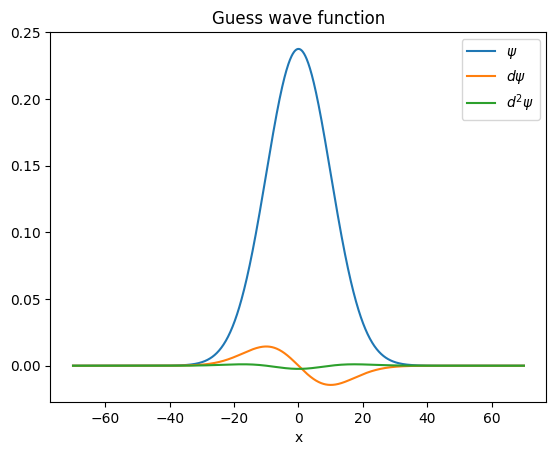

In [5]:
#-----------------------------------------------------------
# Characteristic lengths of the problem
#-----------------------------------------------------------
Lx = 10 # Characteristic length along x

#-----------------------------------------------------------
# Problem's parameters
#-----------------------------------------------------------
hbar = 1
m = 1 # e-mass
wx = hbar / (m * Lx**2) # x confinement frequency

#-----------------------------------------------------------
# Simulation parameters
#-----------------------------------------------------------
bnd = 7
xbounds = (-bnd*Lx, bnd*Lx) #(THIS PARAMETER IS HIGHLY IMPORTANT AND MUST BE CHOSEN CAREFULLY WHEN VARYING N_states: TOO SMALL AND THE WAVEFUNCTION HAS NO TIME TO DECAY, TOO LARGE AND INTEGRATION ACCUMULATES ERROR FROM INTEGRATING REGIONS OF |WAVEFUNCTION| < floating poin precision)
dx = 0.1 # spacing
nx = int(np.abs(xbounds[1] - xbounds[0]) / dx)

#-----------------------------------------------------------
# Creating grid
#-----------------------------------------------------------
mesh_obj = Mesh(dims=1,
                 xbounds=xbounds,
                 nx=nx)

dimx = mesh_obj.Nx
#-----------------------------------------------------------
# Guess basis
#-----------------------------------------------------------
N_states = 4
psi_fn = lambda n, mesh: ho_state(n, mesh, omega = wx, mass = m, hbar = hbar)
basis = (psi_fn, N_states)
for i in range(3):
    plt.plot(mesh_obj.mesh_x, psi_fn(0, mesh_obj.mesh_x)[i], label = [r"$\psi$", r"$d\psi$", r"$d^2\psi$"][i])
plt.xlabel("x")
plt.title("Guess wave function")
plt.legend()

In [6]:
#-----------------------------------------------------------
# Obtaining canonical operators
#-----------------------------------------------------------
operators = canonic_ops(mesh_obj, basis = basis, ops_to_compute = ["p2", "x2"], additional_subspaces = None, hbar=1, limit_divisions=10*nx, threshold = 1e-15)
px2 = operators.get_ops()["p2"]
x2 = operators.get_ops()["x2"]

#-----------------------------------------------------------
# Constructing the Hamiltonian
#-----------------------------------------------------------
H = Hamiltonian(H_time_indep=px2 / (2*m) + 0.5 * m * x2 * wx**2, mesh=mesh_obj, basis = basis)

In [7]:
k = N_states - 2
energies, wavefunctions = H.solve(k, get_spacial=True)

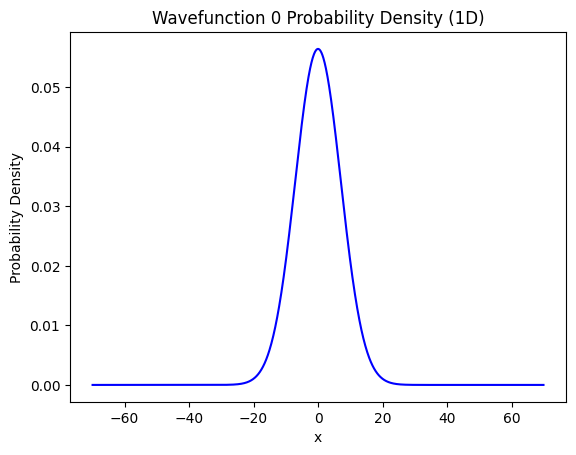

In [8]:
H.plot(0)

Text(0.5, 0, 'n')

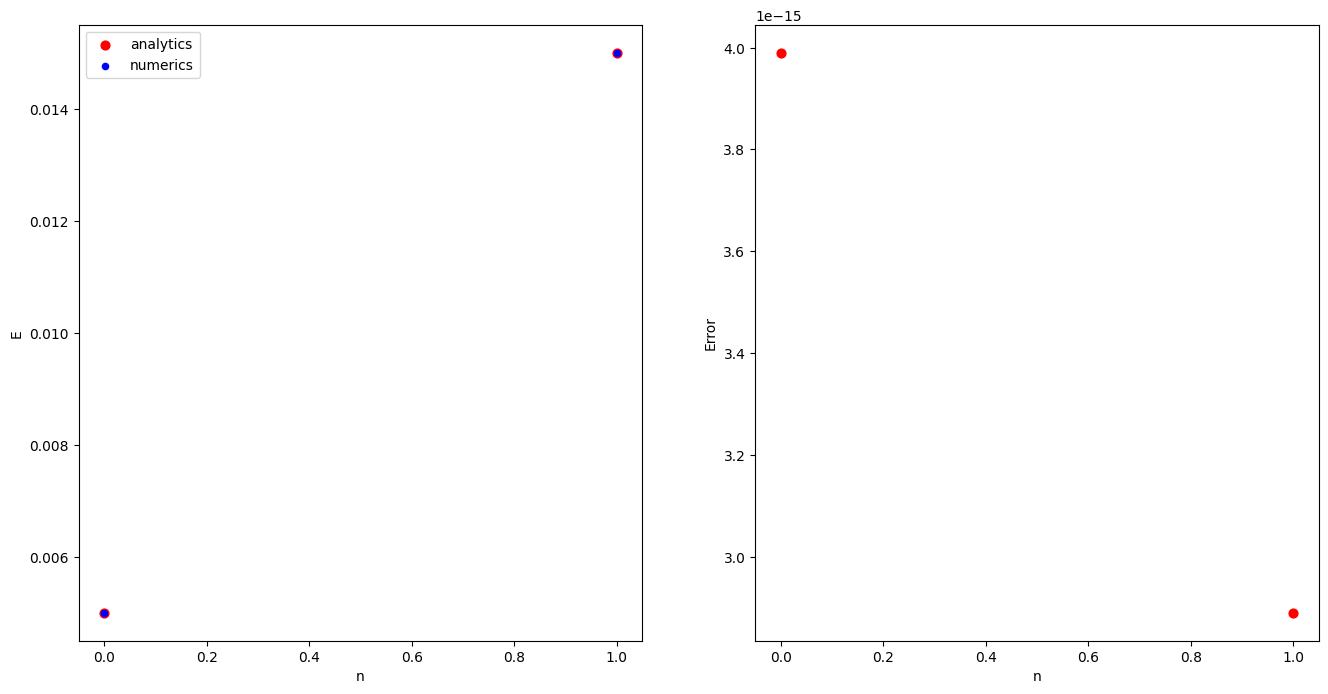

In [9]:
anal = np.array([hbar * wx *(n + 0.5) for n in range(0, k)])
nume = np.array([sorted(energies)])
fig, ax = plt.subplots(1, 2, figsize = (16,8))
ax[0].scatter(range(0, k), anal, c="r", s = 40, label = "analytics")
ax[0].scatter(range(0, k), nume, c="b", s = 20, label = "numerics")
ax[0].legend()
ax[0].set_ylabel("E")
ax[0].set_xlabel("n")

ax[1].scatter(range(0, k), np.abs(anal-nume)/anal , c="r", s = 40)
ax[1].set_ylabel("Error")
ax[1].set_xlabel("n")
#ax[1].set_ylim(0, 1e-13)